**Import Libraries**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

In [22]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data.drop(['Id'] , axis = 1 , inplace = True)

**Data Preprocessing**

In [24]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
data['Species'] = data['Species'].str.replace('Iris-' , '')

In [29]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
data['Species'] = data['Species'].str.replace('setosa' , '1')
data['Species'] = data['Species'].str.replace('versicolor' , '2')
data['Species'] = data['Species'].str.replace('virginica' , '3')

In [31]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [32]:
data["Species"] = pd.to_numeric(data["Species"], downcast = "integer")

**EDA**

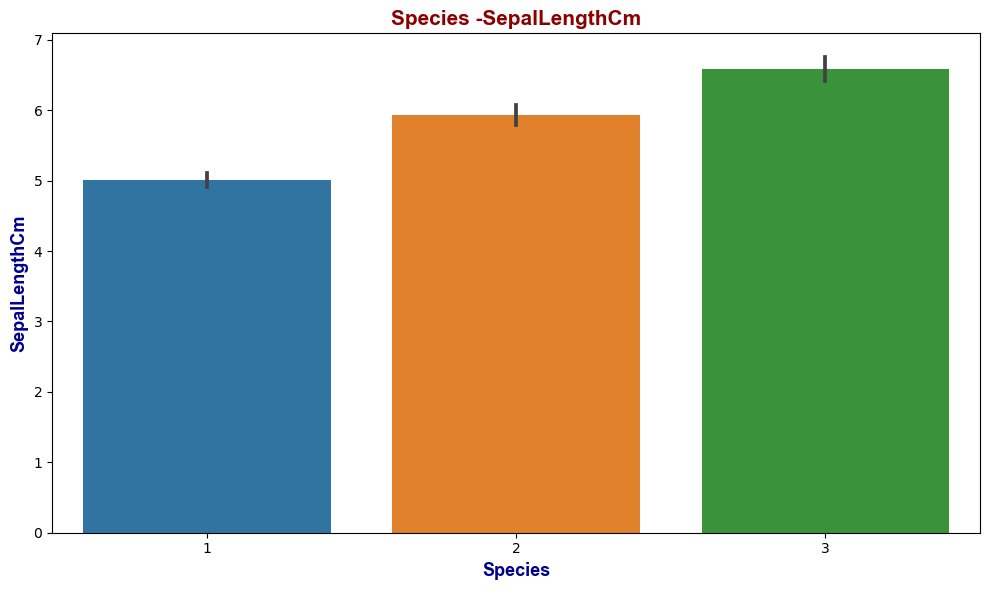

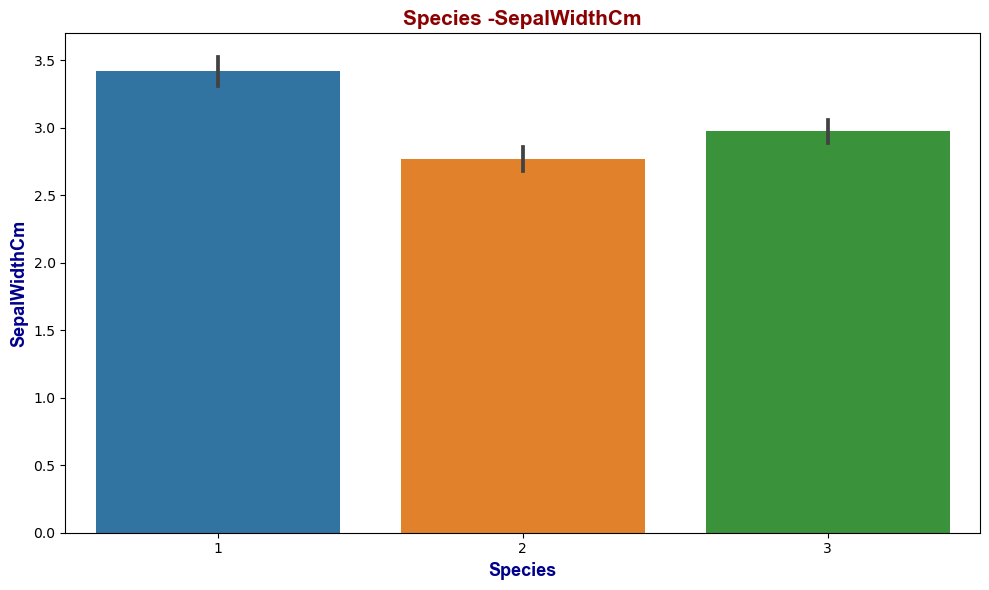

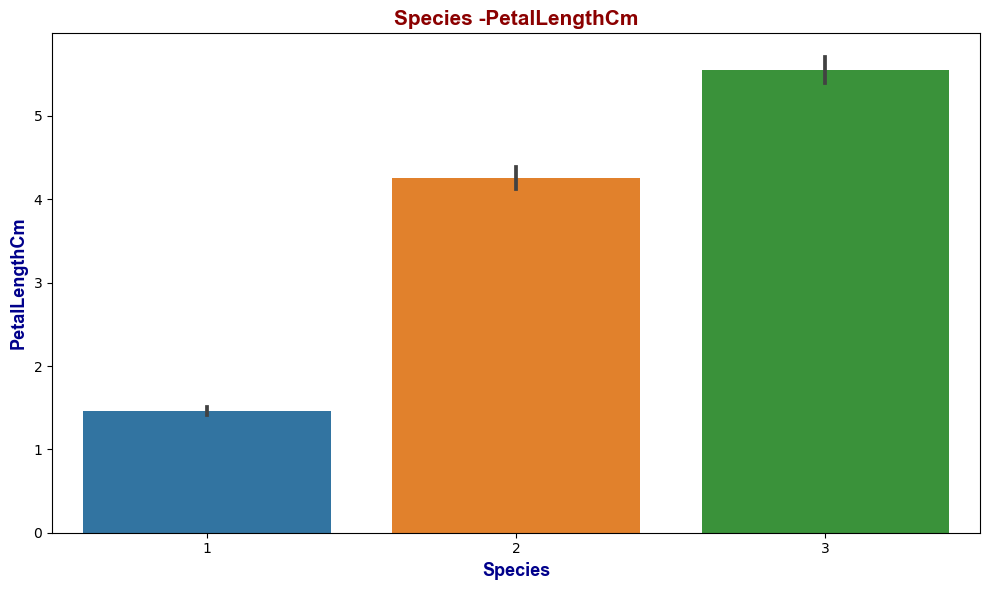

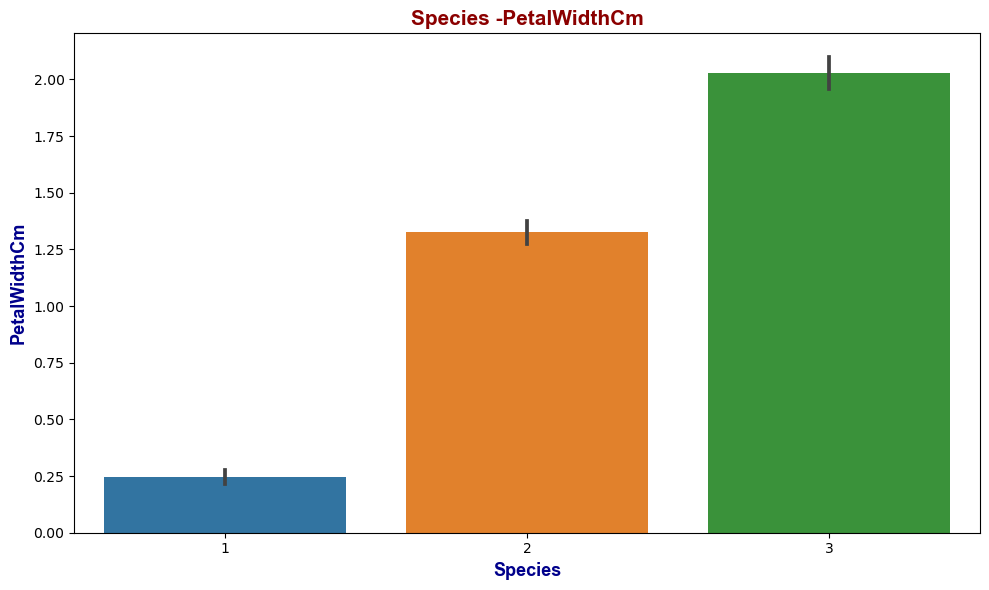

In [33]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}
for i in data.columns[:-1]:
    plt.figure(figsize = (10,6))
    sns.barplot(x = 'Species', y = i, data = data)
        
    plt.title("Species -" + i , fontdict = title_font)
    plt.xlabel("Species", fontdict = axis_font)
    plt.ylabel(i, fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

**Heatmap**

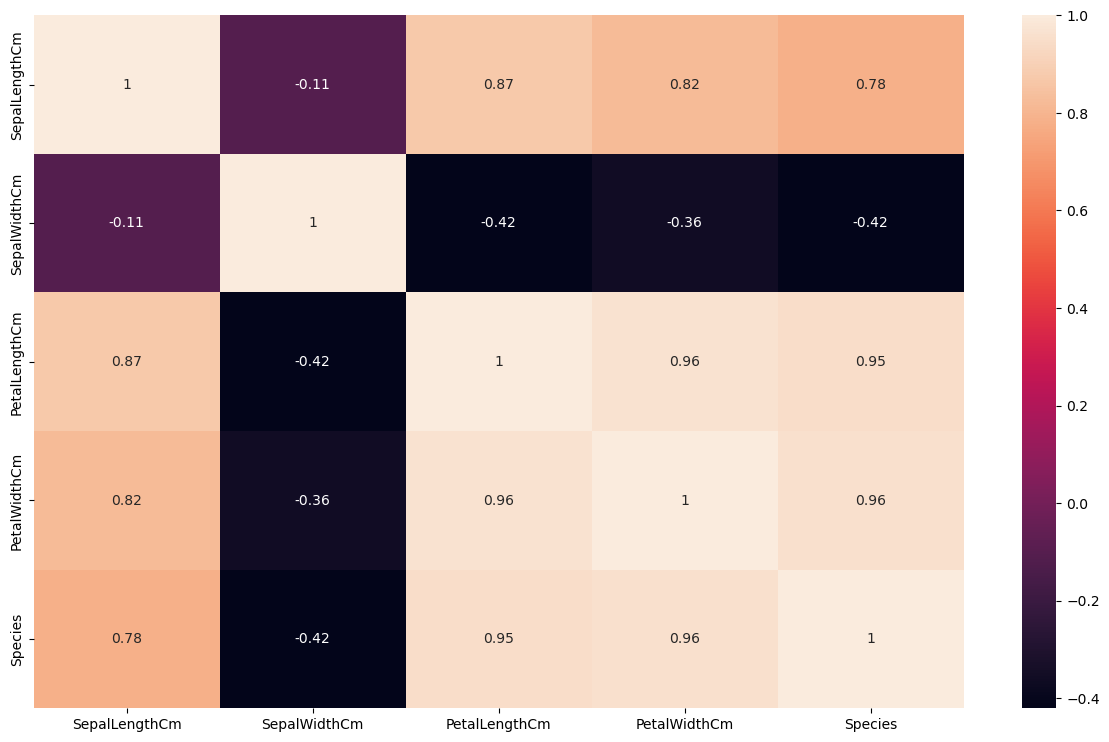

In [34]:
plt.figure(figsize = (15,9))
sns.heatmap(data.corr() , annot = True)
plt.show()

In [35]:
data.drop(['SepalWidthCm'] , axis = 1 , inplace = True)

In [36]:
data.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1


**Modelling**

In [37]:
X = data.drop(['Species'] , axis = 1)
y = data['Species']

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
train , test = train_test_split(data ,  test_size=0.25, random_state=42)

**Guassian Naive Bayes**

In [45]:
col_names=list(data.columns)
predictors=col_names[0:3]
target=col_names[3]


In [47]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
Gmodel.fit(train[predictors],train[target])
train_Gpred=Gmodel.predict(train[predictors])
test_Gpred=Gmodel.predict(test[predictors])

train_acc_gau=np.mean(train_Gpred==train[target])
test_acc_gau=np.mean(test_Gpred==test[target])
train_acc_gau


0.9375

In [48]:
test_acc_gau

1.0

**Multinomial Naive Bayes**

In [50]:
from sklearn.naive_bayes import MultinomialNB
Mmodel=MultinomialNB()
Mmodel.fit(train[predictors],train[target])
train_Mpred=Mmodel.predict(train[predictors])
test_Mpred=Mmodel.predict(test[predictors])

train_acc_multi=np.mean(train_Mpred==train[target])
test_acc_multi=np.mean(test_Mpred==test[target])
train_acc_multi


0.9017857142857143

In [51]:
test_acc_multi

0.9736842105263158